## KNN (K-Nearest Neighbors)
#### K-Nearest Neighbors is one of the oldest and simplest algorithms of machine learning. In fact, there's not so much learning happening: the predictions are given as the majority (classification) or the average (regression) of the labels in the close neighborhood of the input, unannotated example. KNN can be very accurate recently, however, it was for a long time considered as slow at prediction time. However, modern libraries made this algorithm very fast and today it can easily compete with the state-of-the-art techniques.

### Pros:
- No assumptions about data :  works well for non-linearly separable data;
- Simple to implement;
- Flexible to feature/distance choices;
- Naturally handles multi-class cases;
- Does well in practice with enough representative data
- Can be used for both classification and regression.

### Cons:
- Search in a large space of examples to find nearest neighbors can be slow (mostly resolved in modern libraries);
- With a lot of training examples, the model can require a lot of memory;
- Sensitive to irrelevant features and the scale of the data.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

from my_ml_tools.my_ml_plot import Plot_2d
from my_ml_tools.my_ml_plot import Plot_2d_decision

In [2]:
class myKNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_test):
        labels = []
        self.distance_ = []
        self.neighbors_ = []
        for i in range(X_test.shape[0]):
            distance = np.sqrt(np.square(X_test[i, 0] - self.X[:, 0]) + np.square(X_test[i, 1] - self.X[:, 1]))
            neighbors = distance.argsort()[:self.n_neighbors]
            self.neighbors_.append(neighbors)
            self.distance_.append(sorted(distance)[:self.n_neighbors])
            labels.append(np.bincount(self.y[neighbors]).argmax())
        return labels

In [3]:
def plot_myKNN(X, y, X_test, n_neighbors=5, ax=None):
    if ax is None:
        ax = plt.gca()
        
    knn = myKNN(n_neighbors=n_neighbors)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', c='red', s=200)
    for i in range(X_test.shape[0]):
        ax.text(X_test[i, 0], X_test[i, 1], s=f'({i})')
    
    for i in range(X_test.shape[0]):
        for j in knn.neighbors_[i]:
            ax.plot([X_test[i, 0], X[j, 0]], [X_test[i, 1], X[j, 1]], 'k:')
    ax.set_title(f'Predicted labels = {y_pred}')
    print(f'{n_neighbors}-nearest neighbors: {knn.neighbors_}')
    print(knn.distance_)

3-nearest neighbors: [array([7, 1, 6]), array([4, 1, 5])]
[[0.9486832980505138, 1.0816653826391966, 1.315294643796591], [0.9219544457292889, 1.6155494421403511, 2.80178514522438]]


(0.0, 1.0, 0.0, 1.0)

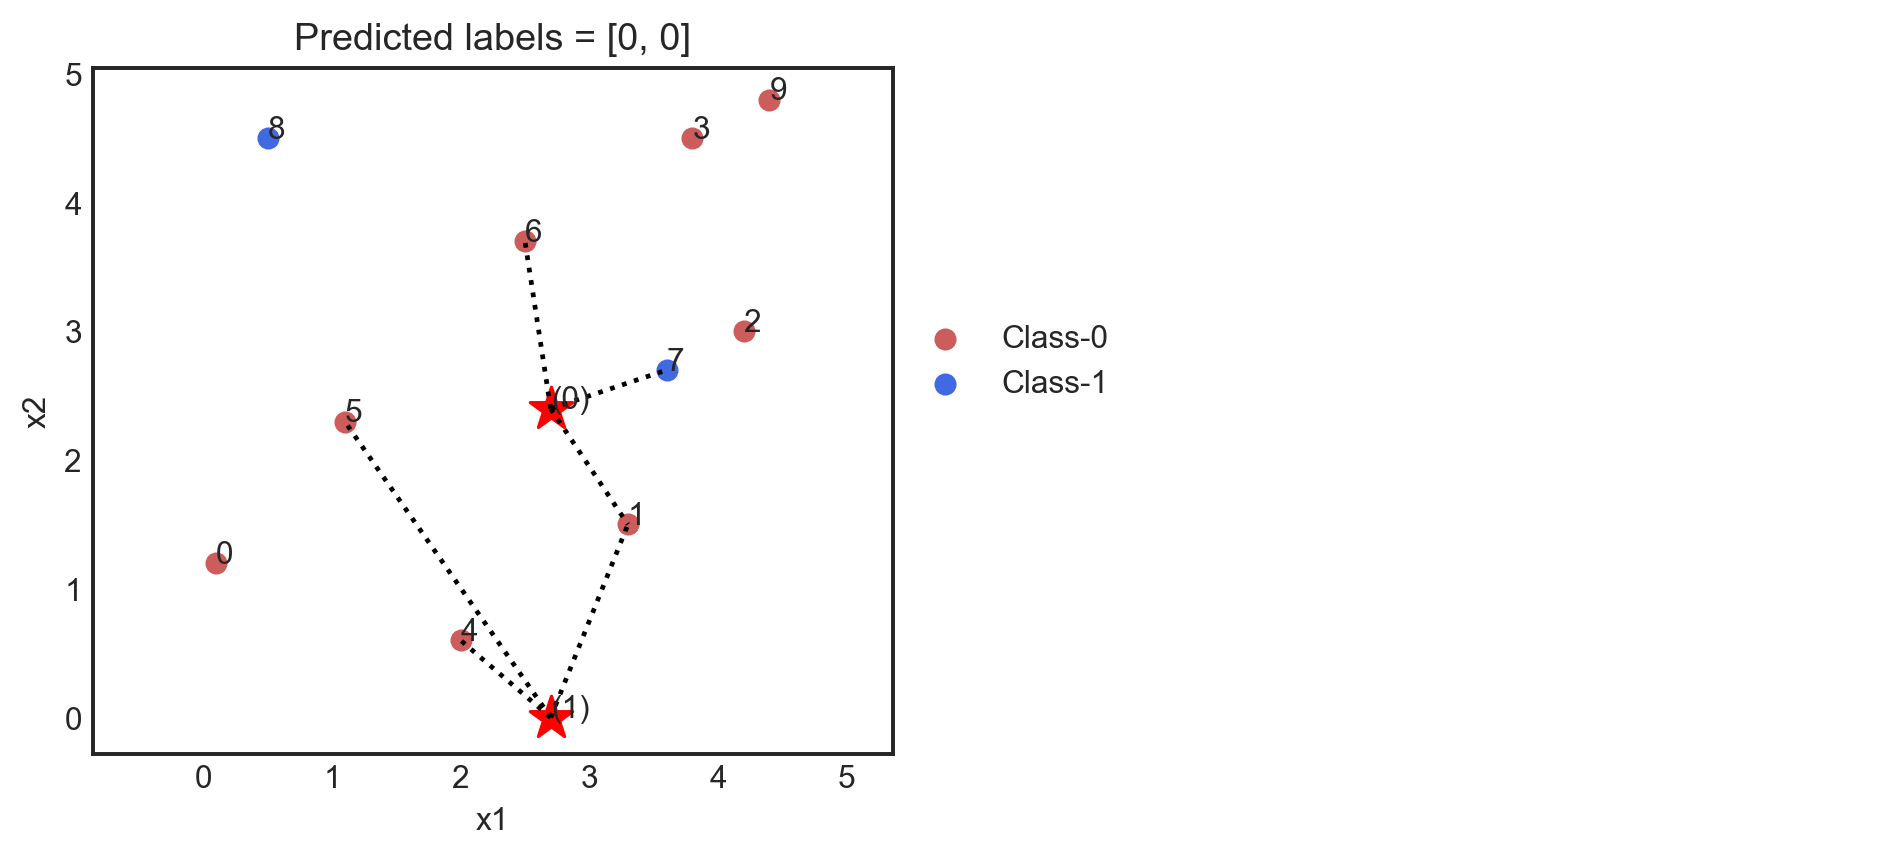

In [4]:
n_train = 10
X = (np.random.randint(0, 50, n_train*2) / 10).reshape(-1, 2)
y = np.random.choice([0, 1], n_train)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_2d(X, y, ax=axes[0])

for i in range(y.size):
    axes[0].text(X[i, 0], X[i, 1], s=f'{i}')

n_test = 2
X_test = (np.random.randint(0, 50, n_test*2) / 10).reshape(-1, 2)

plot_myKNN(X, y, X_test, n_neighbors=3, ax=axes[0])

axes[0].legend(loc=[1.01, 0.5])
axes[0].axis('equal')
axes[1].axis('off')

### A toy dataset

3-nearest neighbors: [array([68, 82, 47]), array([23, 85,  6]), array([80, 78, 92]), array([74,  5, 41]), array([ 9, 77, 23])]
[[0.31369763869250716, 0.5030630178320271, 0.7320966085802649], [0.20588056527169846, 0.35287056381041715, 0.4197641254836041], [0.23286428565690206, 0.6028568448835726, 0.7755965249198707], [0.27098457986876706, 0.6497772851717388, 0.7689012640752337], [0.3351660063151428, 0.529379585257792, 0.7063651506490789]]


(0.0, 1.0, 0.0, 1.0)

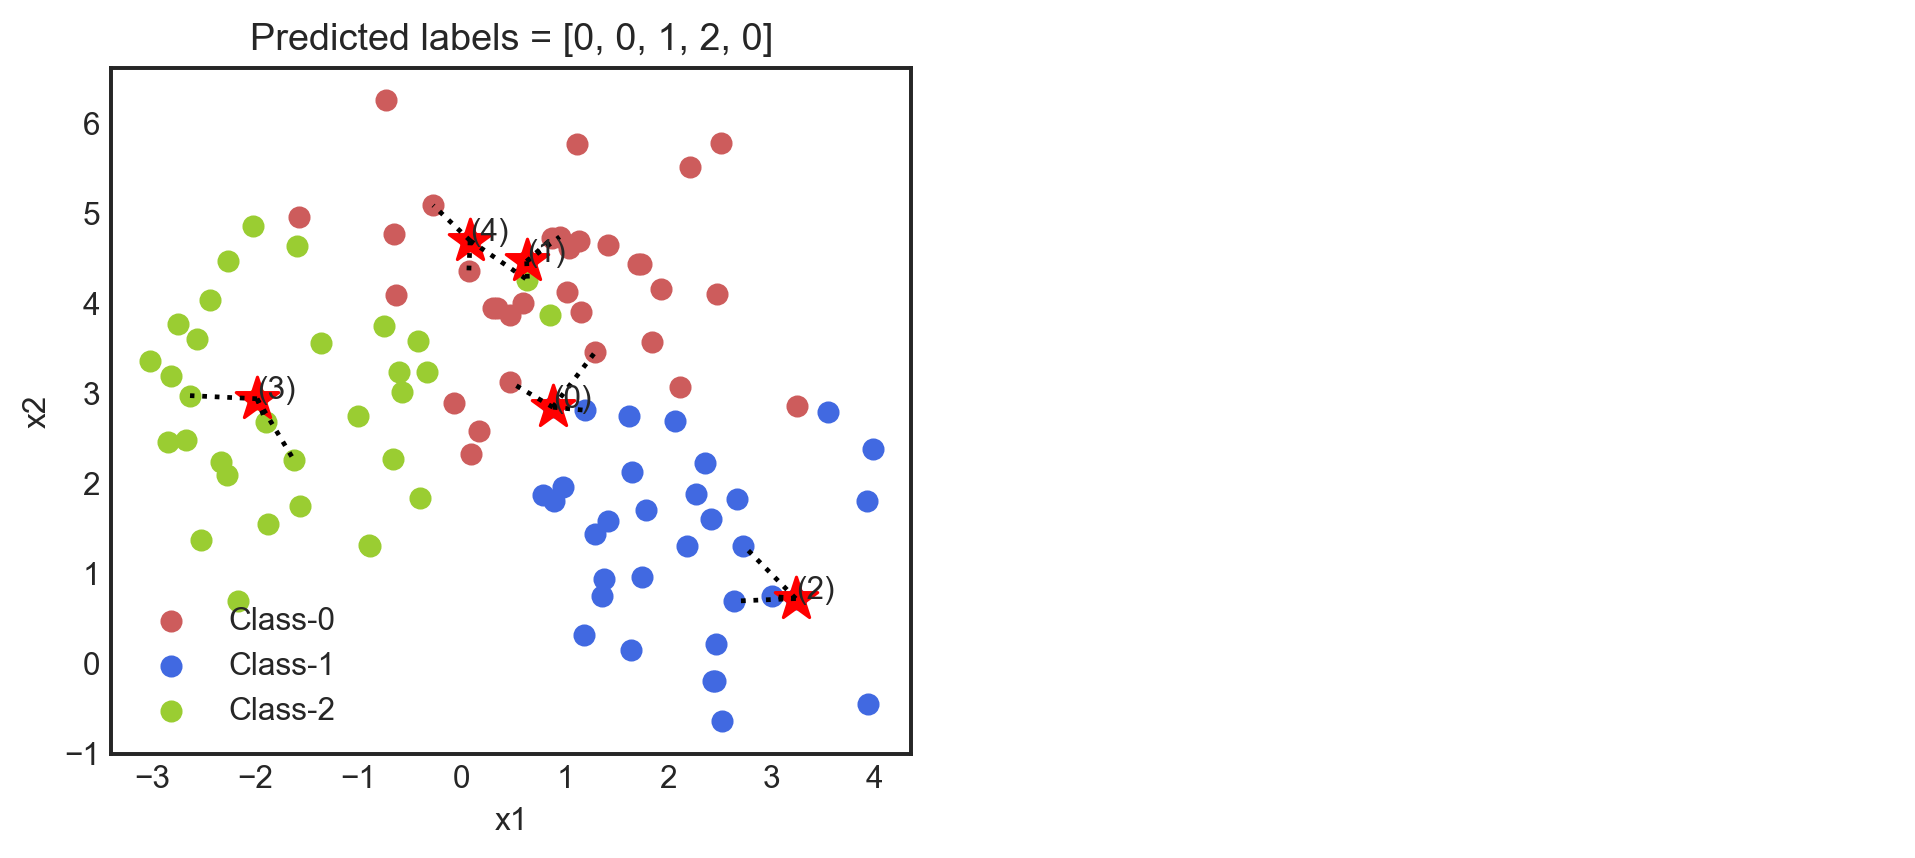

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y, 
    test_size=0.05,
    random_state=0
)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_2d(X, y, axes[0])
plot_myKNN(X_train, y_train, X_test, n_neighbors=3, ax=axes[0])
axes[1].axis('off')

Accuracy of Train set: 0.943
Accuracy of Test set: 1.000


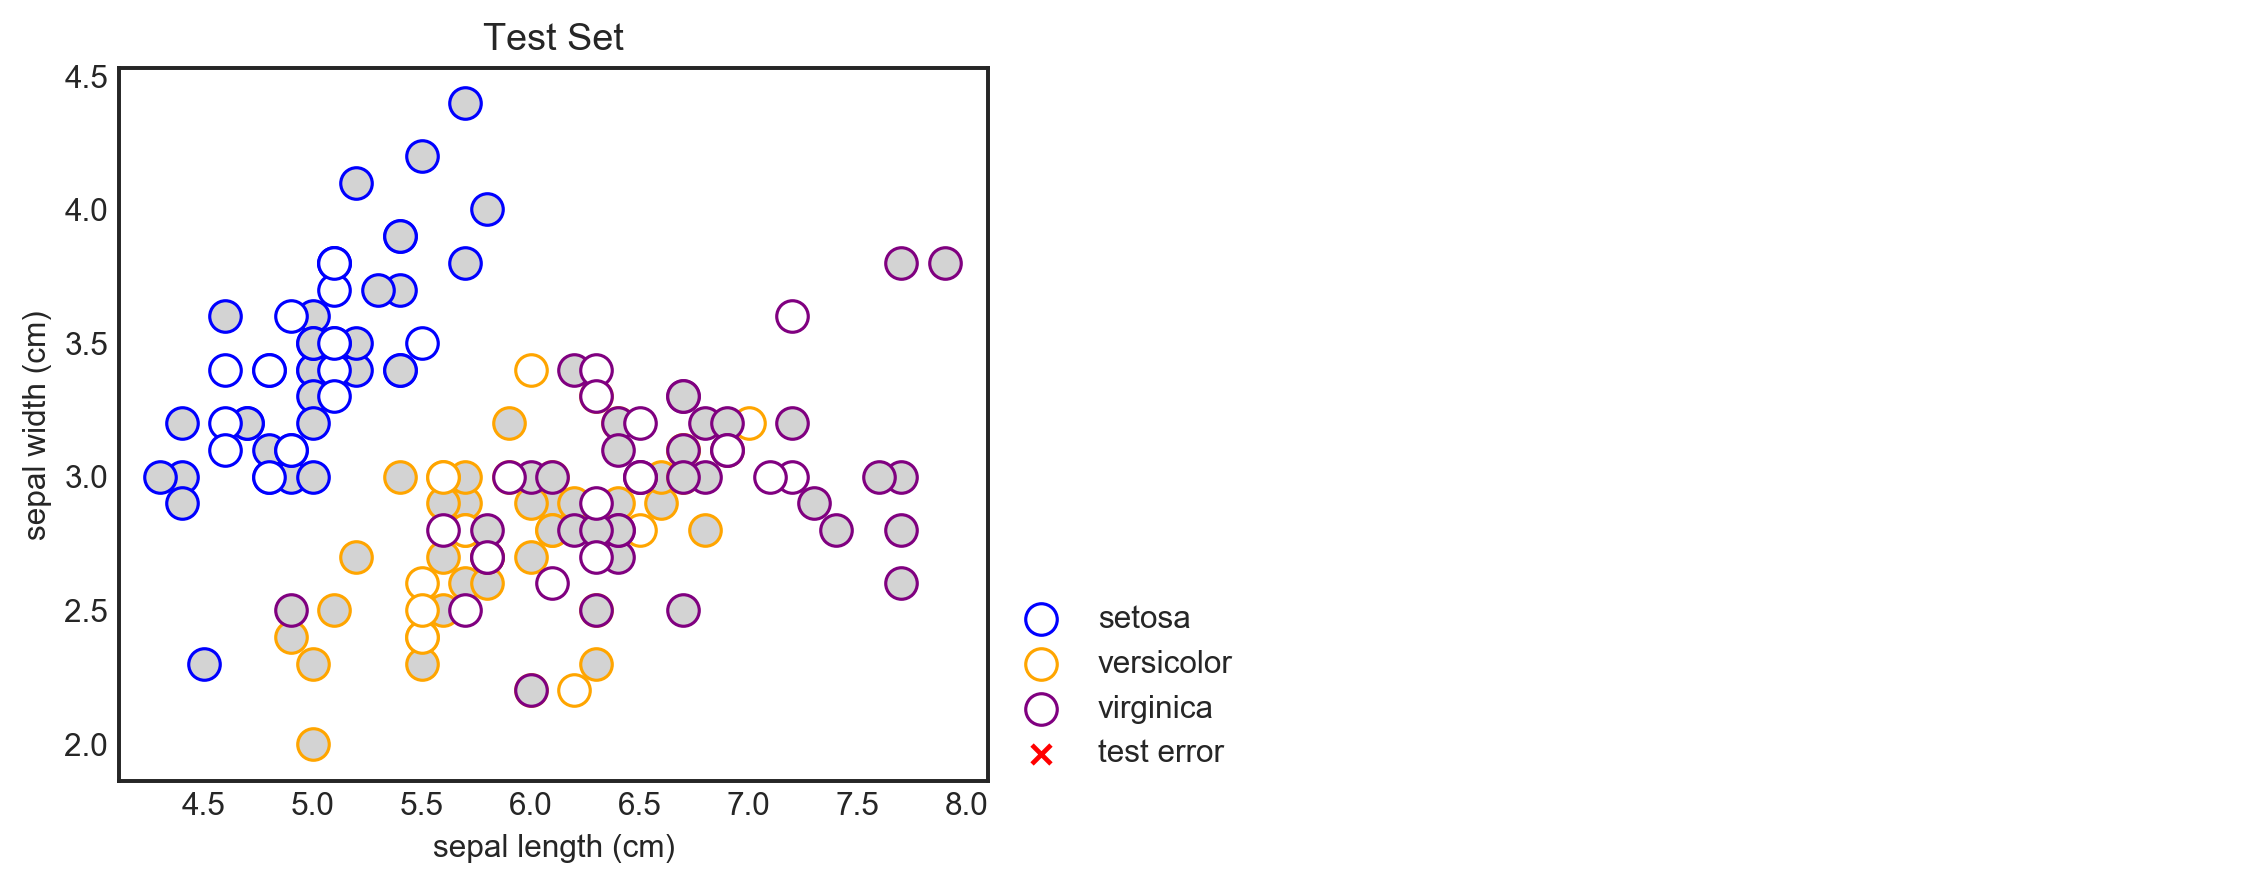

In [6]:
from sklearn.datasets import load_iris
dataset = load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target,
    stratify=dataset.target, 
    test_size=0.3,
    random_state=0
)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
colors = ['blue', 'orange', 'purple']
for i in range(len(np.unique(dataset.target))):
    axes[0].scatter(X_train[np.where(y_train == i), 0], X_train[np.where(y_train == i), 1], s=100, c='lightgray', edgecolor=colors[i])
    axes[0].scatter(X_test[np.where(y_test == i), 0], X_test[np.where(y_test == i), 1], s=100, c='w', edgecolor=colors[i], label=dataset.target_names[i])
axes[0].scatter(X_test[np.where(y_test != y_pred), 0], X_test[np.where(y_test != y_pred), 1], c='red', marker='x', label='test error')
axes[0].set_xlabel(dataset.feature_names[0])
axes[0].set_ylabel(dataset.feature_names[1])
axes[0].set_title('Test Set')
axes[0].legend(loc=(1.01, 0))
axes[1].axis('off')
plt.tight_layout()
print(f'Accuracy of Train set: {clf.score(X_train, y_train):.3f}')
print(f'Accuracy of Test set: {clf.score(X_test, y_test):.3f}')

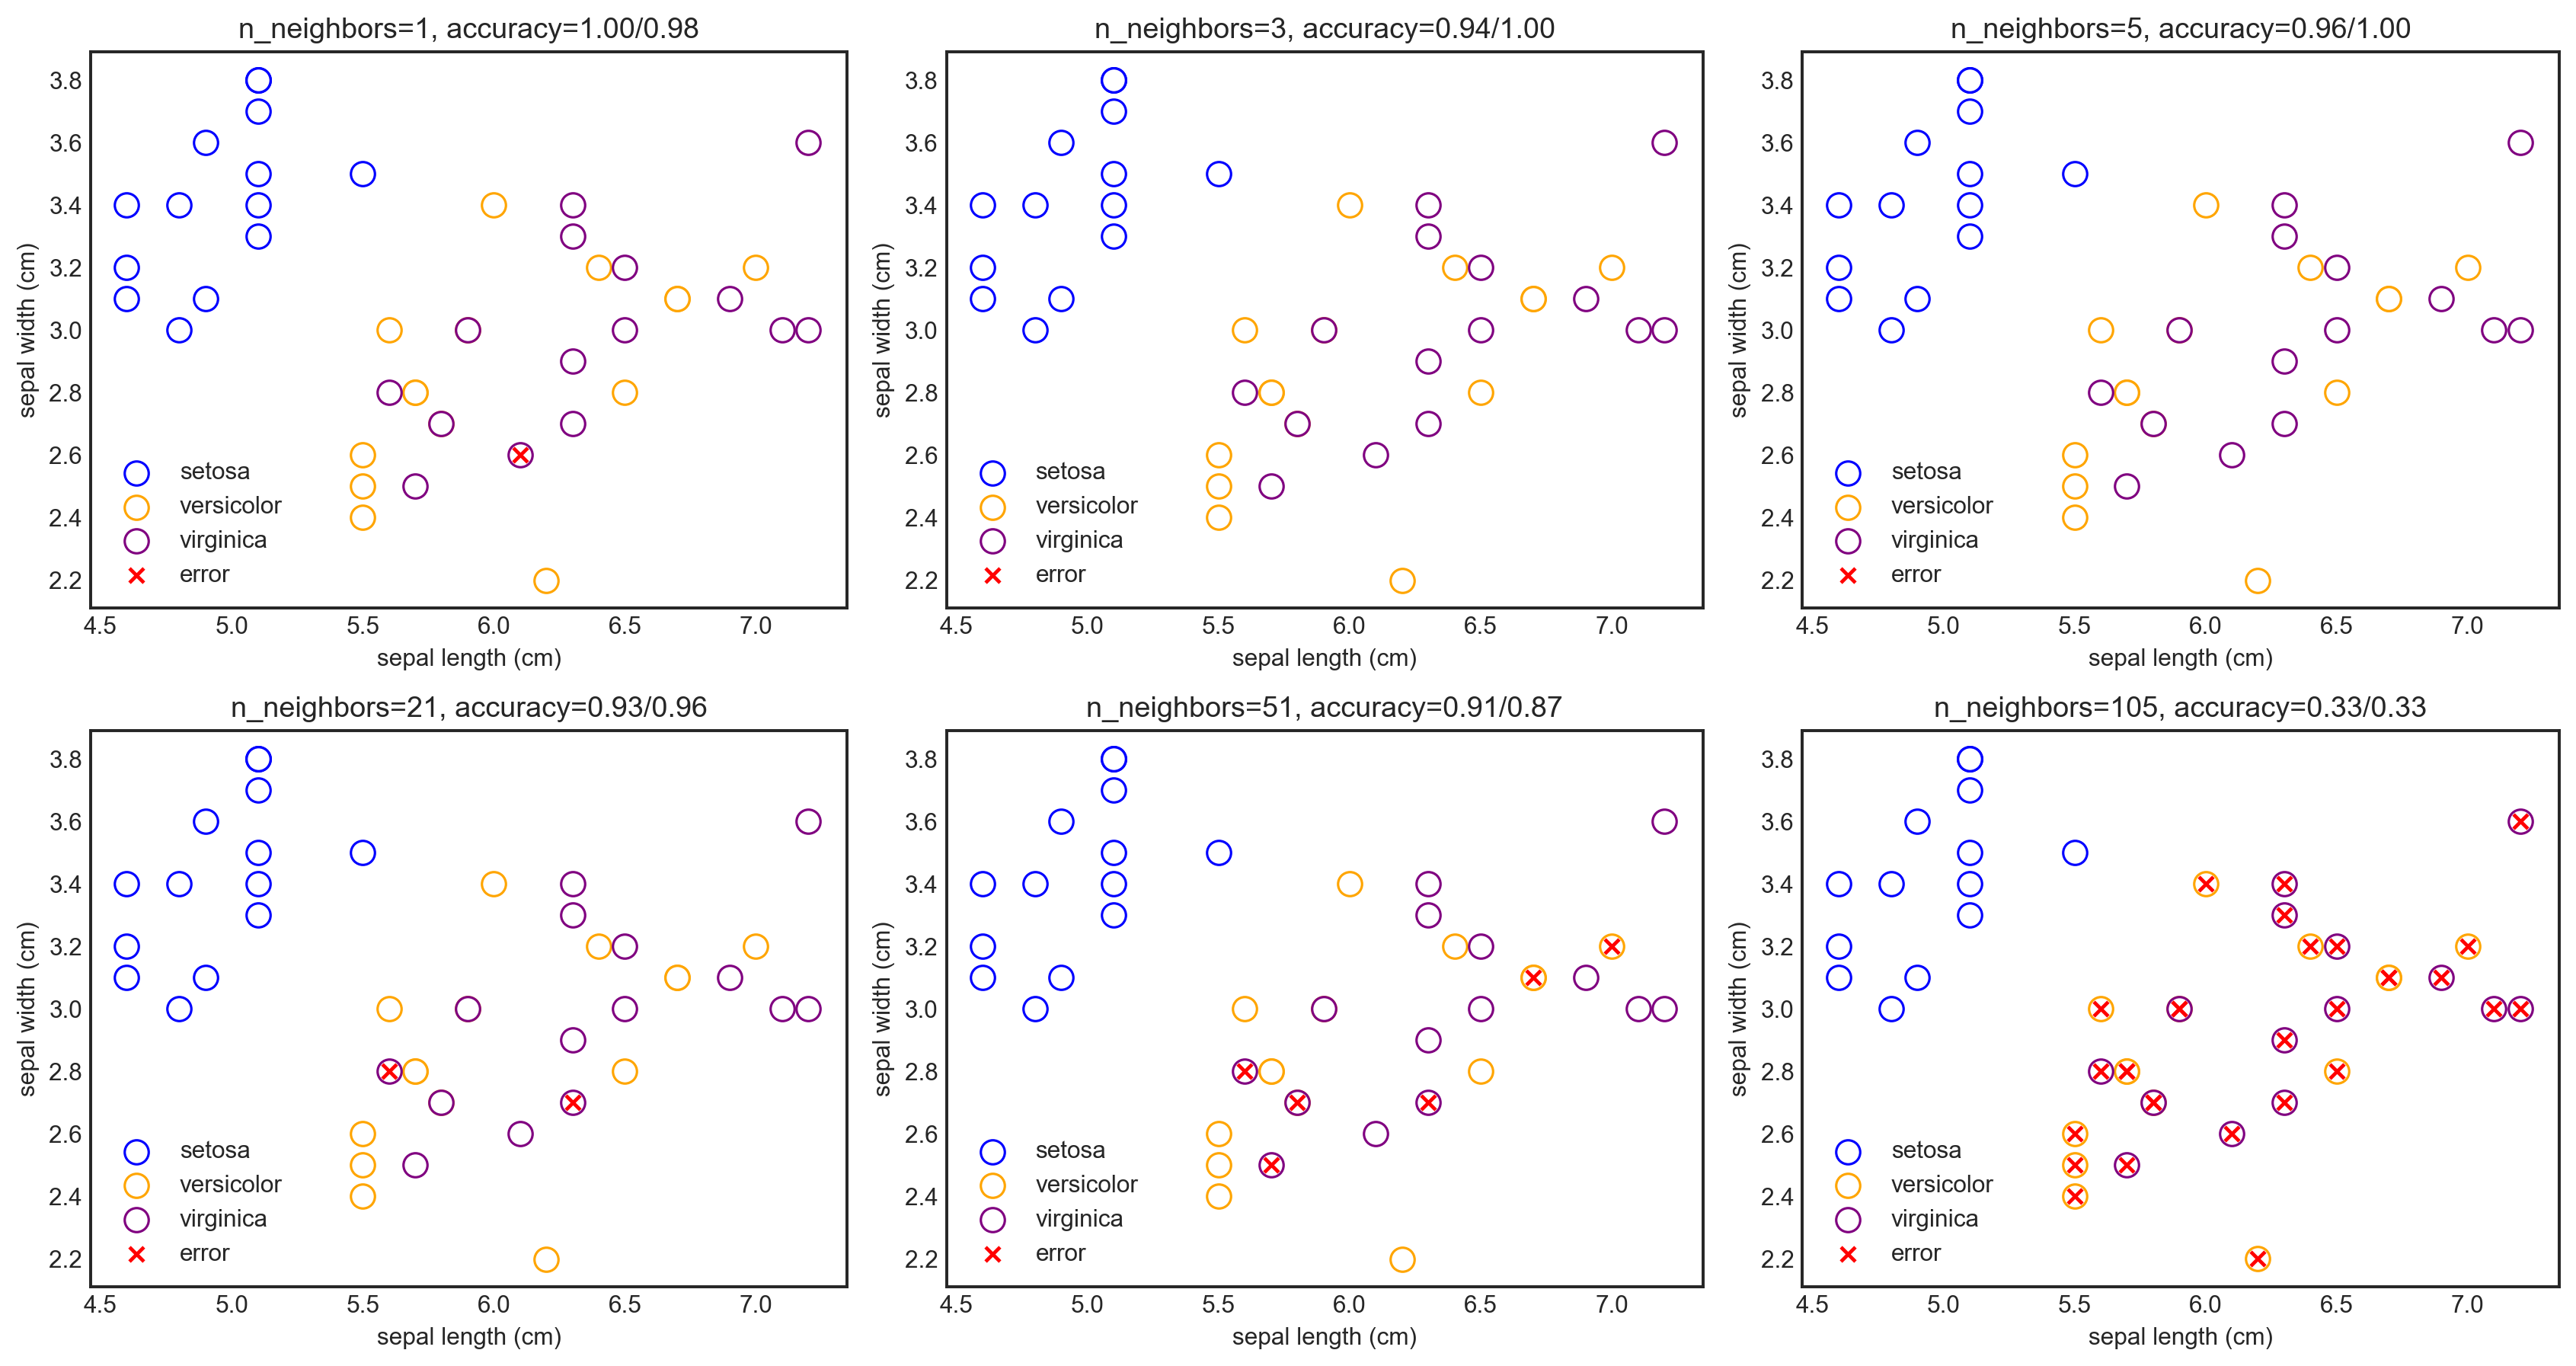

In [7]:
fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))

neighbors = [1, 3, 5, 21, 51, X_train.shape[0]]
for (neighbor, ax) in zip(neighbors, axes.ravel()):
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    for i in range(len(np.unique(dataset.target))):
        ax.scatter(X_test[np.where(y_test == i), 0], X_test[np.where(y_test == i), 1], s=100, c='w', edgecolor=colors[i], label=dataset.target_names[i])
    ax.scatter(X_test[np.where(y_test != y_pred), 0], X_test[np.where(y_test != y_pred), 1], c='red', marker='x', label='error')
    ax.set_xlabel(dataset.feature_names[0])
    ax.set_ylabel(dataset.feature_names[1])
    s_train = clf.score(X_train, y_train)
    s_test = clf.score(X_test, y_test)
    ax.set_title(f'n_neighbors={neighbor}, accuracy={s_train:.2f}/{s_test:.2f}')
    ax.legend()

plt.tight_layout()

In [8]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

2    35
1    35
0    35
dtype: int64
2    15
1    15
0    15
dtype: int64


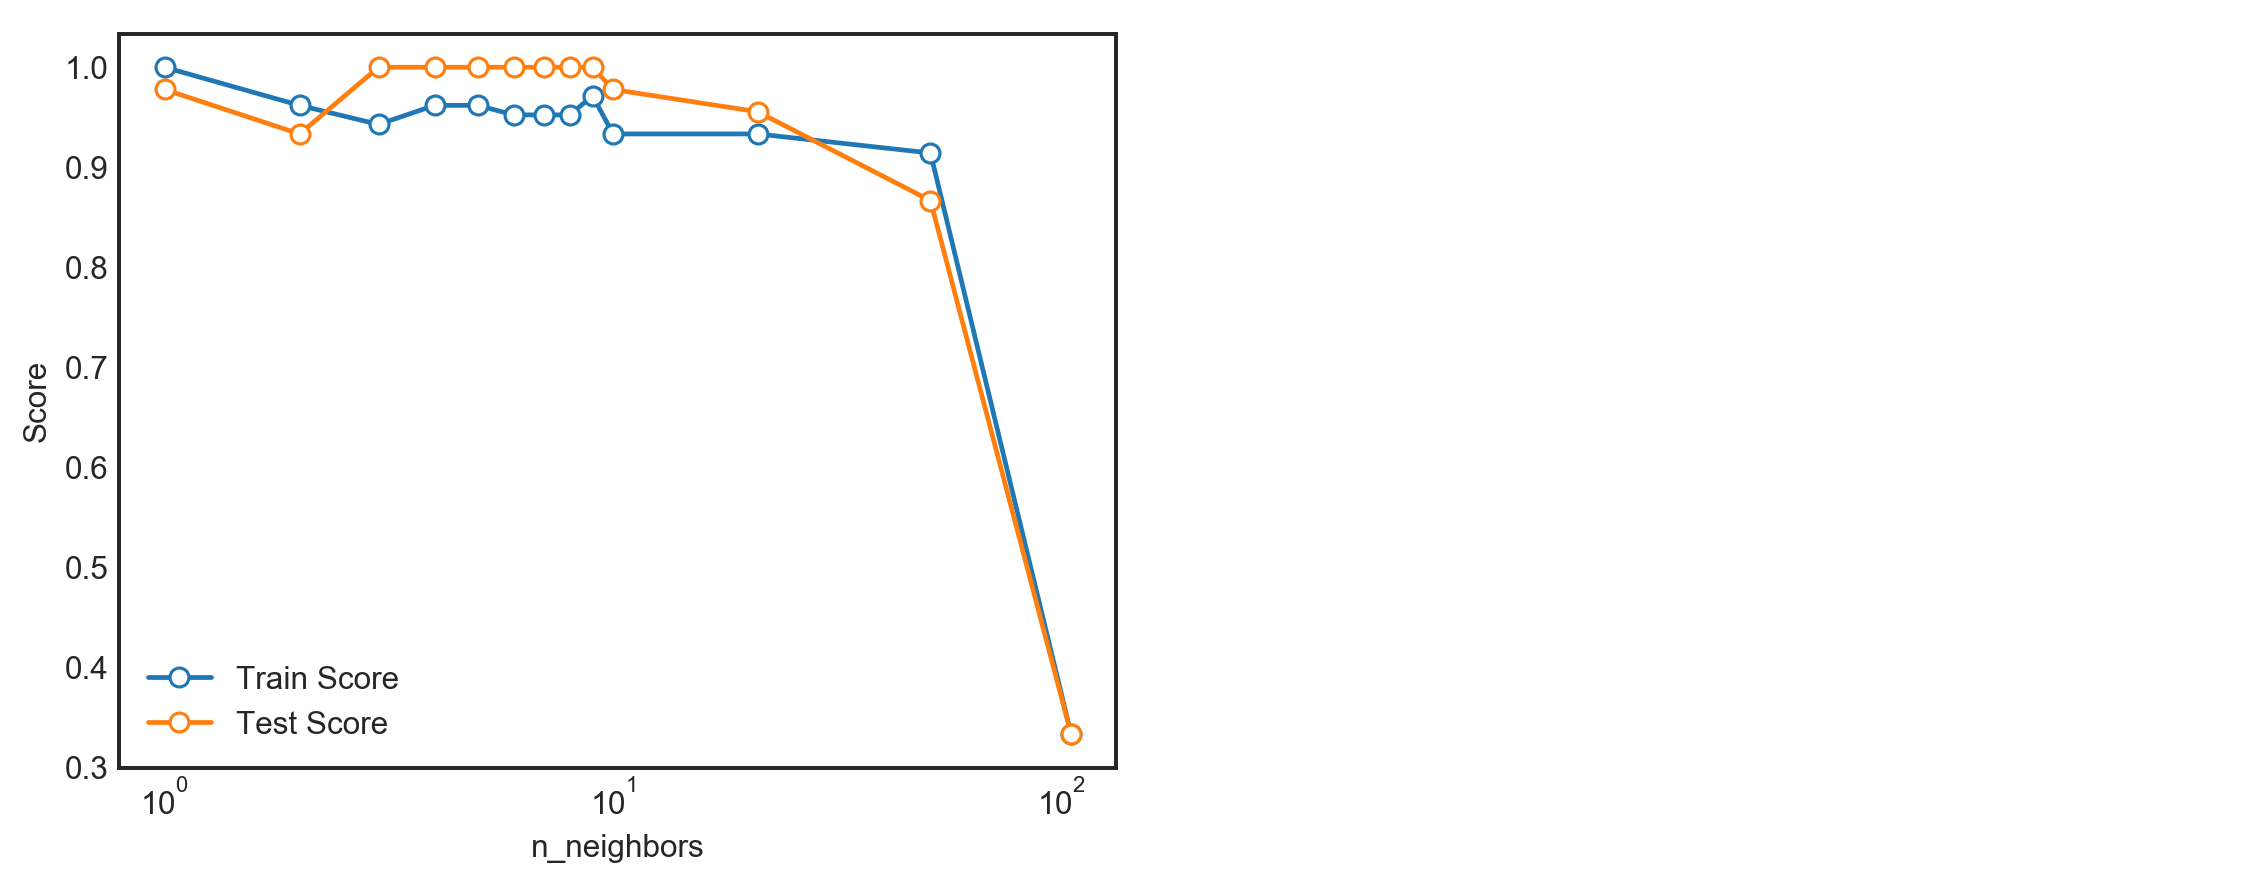

In [9]:
score_train = []
score_test = []
neighbors = [i for i in range(1, 11)] + [21, 51, X_train.shape[0]]
for neighbor in neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train, y_train)
    score_train.append(clf.score(X_train, y_train))
    score_test.append(clf.score(X_test, y_test))

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(neighbors, score_train, marker='o', mfc='w', label='Train Score')
axes[0].plot(neighbors, score_test, marker='o', mfc='w', label='Test Score')
axes[0].legend()
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('Score')
axes[0].set_xscale('log')
axes[1].axis('off')
plt.tight_layout()

### Reduce number of features to visualize decision boundary

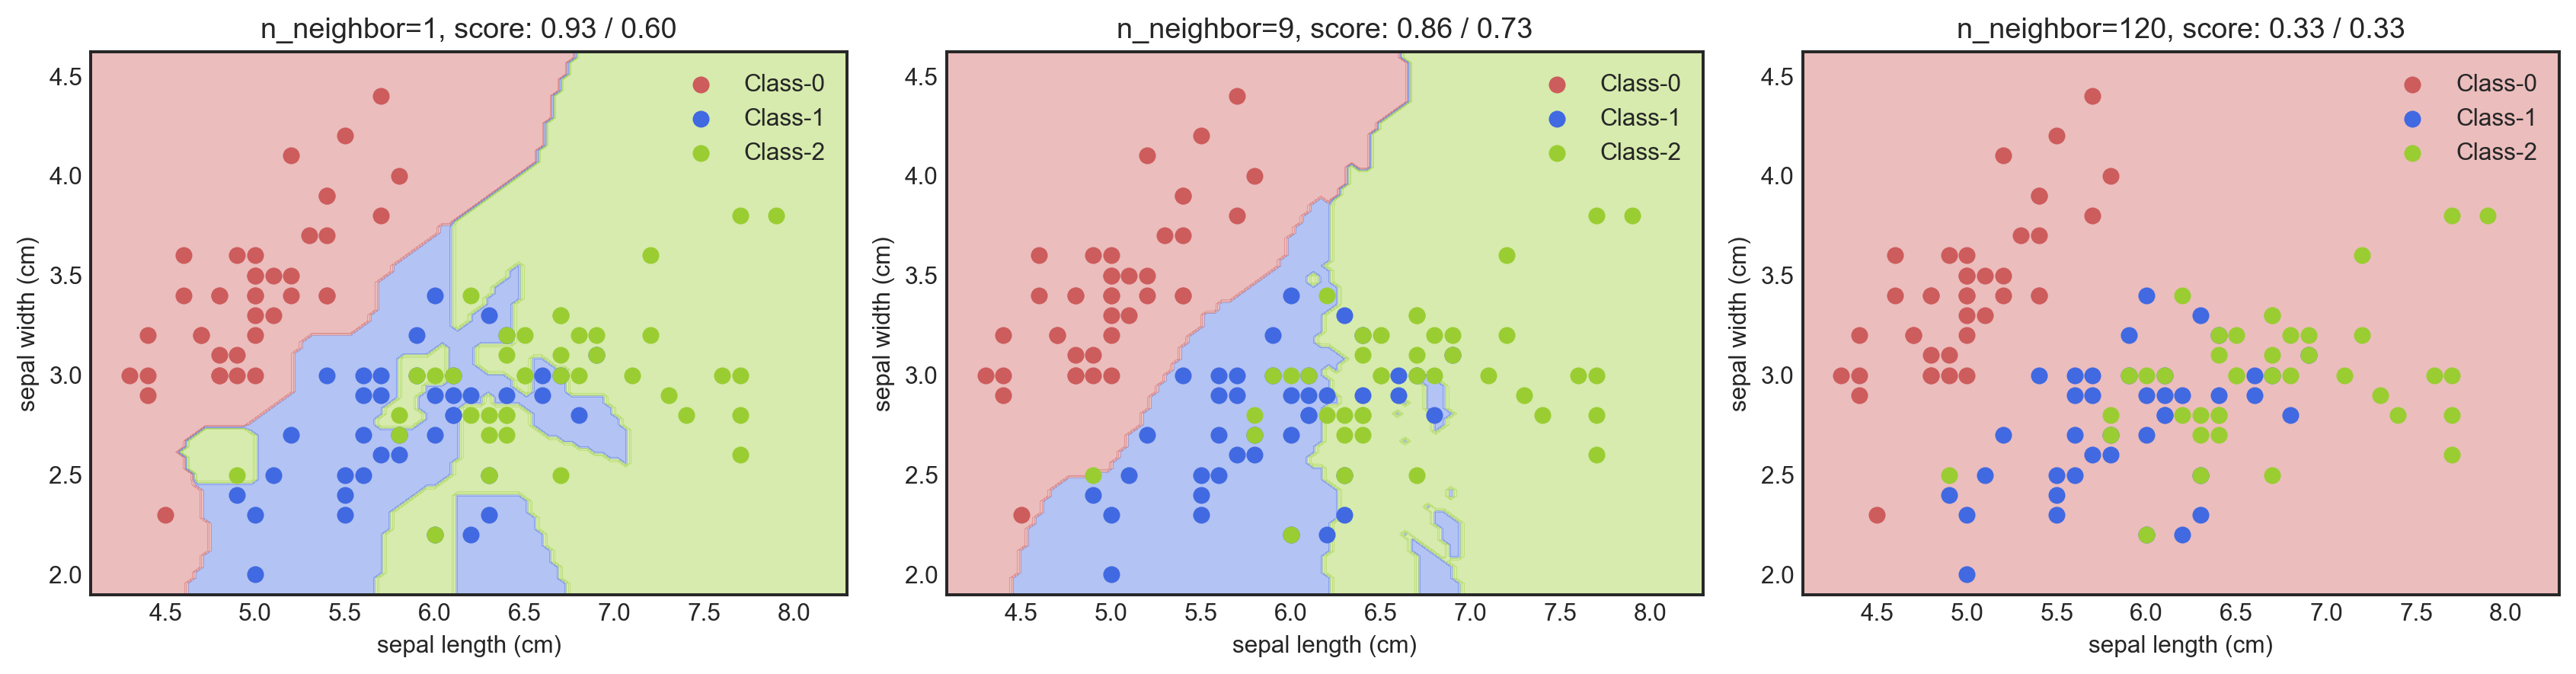

In [10]:
X = dataset.data[:, :2]
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))
for (ax, neighbor) in zip(axes, [1, 9, X_train.shape[0]]):
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train, y_train)
    Plot_2d_decision(clf, X_train, y_train, ax=ax, fillcolor=True)
    Plot_2d(X_train, y_train, ax=ax)
    ax.set_xlabel(dataset.feature_names[0])
    ax.set_ylabel(dataset.feature_names[1])
    ax.set_title(
        f'n_neighbor={neighbor}, '
        f'score: {clf.score(X_train, y_train):.2f} / {clf.score(X_test, y_test):.2f}'
    )
    ax.legend()
plt.tight_layout()